In [23]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import helpers as H
from tqdm import tqdm

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")
#train_data_paths = glob.glob(os.path.join(TRAIN_DATASET_PATH,'img_datas_1','*.npy'))
train_data_paths = os.listdir(os.path.join(TRAIN_DATASET_PATH, "img_datas_1"))
print(len(train_data_paths))


218


In [2]:
def to_3D(arr, resize_dim=None):
    '''Stack 2D slice to add dummy 3-channel dimension'''
    img = np.asarray(np.dstack((arr, arr, arr)), dtype=np.float64)
    if resize_dim is not None:
        img=cv2.resize(img,(resize_dim, resize_dim),interpolation=cv2.INTER_AREA)    
    else:
        pass
    return img

In [3]:
def get_number(filename):
    return int(filename[:filename.find('.')])

def sort_paths(paths):
    paths.sort(key = get_number)
    return paths

In [4]:
train_data_paths[:4]

['1.npy', '10.npy', '100.npy', '101.npy']

In [5]:
sort_paths(train_data_paths)[:5]

['1.npy', '2.npy', '3.npy', '4.npy', '5.npy']

In [6]:
y_train = np.load("y_train_clef.npy")
y_train.shape

(218, 2)

In [7]:
y_train_flat = np.array([np.argmax(x) for x in y_train])
y_train_flat.shape

(218,)

In [8]:
y_train_flat

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

### Test before and after saving slices

In [24]:
img = np.load("{}/img_datas_1/{}".format(TRAIN_DATASET_PATH, "1.npy"))
img.shape

(512, 512, 128)

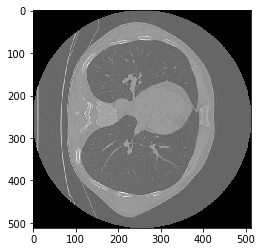

In [10]:
plt.imshow(img[:,:,55], cmap='gray')

-3024.0 2367.0


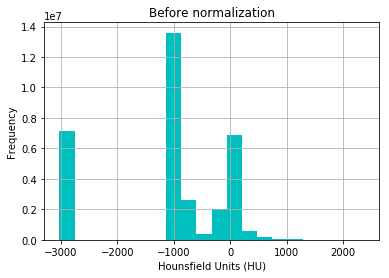

In [25]:
img_flat = img.flatten()
print(min(img_flat), max(img_flat))
plt.hist(img_flat, bins=20, color='c')
plt.title("Before normalization")
plt.xlabel("Hounsfield Units (HU)")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [26]:
exp = np.transpose(img, (2, 0, 1))
exp.shape

(128, 512, 512)

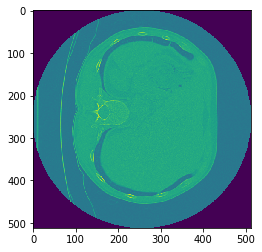

In [27]:
plt.imshow(exp[10,:,:])

In [15]:
exp.shape

(128, 512, 512)

In [28]:
exp_res = H.seperate_lungs_and_pad(exp)
exp_res.shape

(128, 512, 512)

In [29]:
a = np.transpose(exp_res, (1, 2, 0))
a.shape

(512, 512, 128)

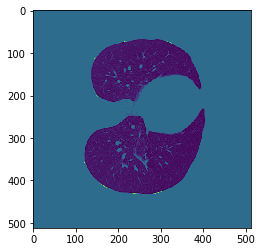

In [31]:
plt.imshow(a[:,:,40])

In [34]:
a = H.threshold_and_normalize_scan(exp_res)
a.shape

(128, 512, 512)

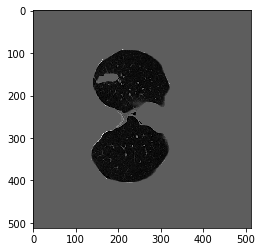

In [35]:
plt.imshow(exp_res[100,:,:], cmap='gray')

-0.9309091 0.6363636


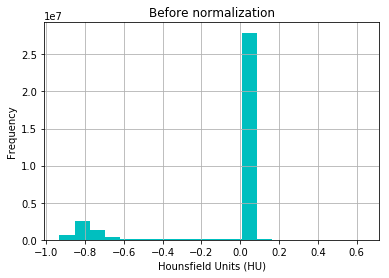

In [36]:
img_flat = a.flatten()
print(min(img_flat), max(img_flat))
plt.hist(img_flat, bins=20, color='c')
plt.title("Before normalization")
plt.xlabel("Hounsfield Units (HU)")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [ ]:
img_norm = H.normalize(img)
img_norm.shape

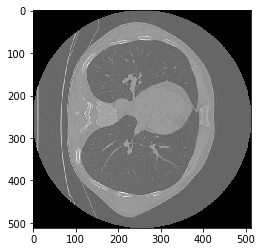

In [13]:
plt.imshow(img_norm[:,:,55], cmap='gray')

0.0 1.0


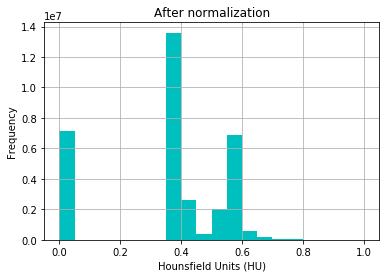

In [14]:
img_flat = img_norm.flatten()
print(min(img_flat), max(img_flat))
plt.hist(img_flat, bins=20, color='c')
plt.title("After normalization")
plt.xlabel("Hounsfield Units (HU)")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [15]:
img_norm.shape

(512, 512, 128)

In [16]:
x = H.center_crop(img_norm[:,:,55], (320, 320))
x.shape

(320, 320)

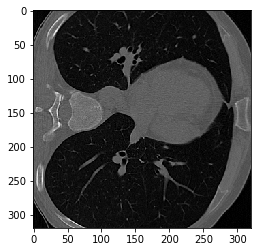

In [17]:
plt.imshow(x, cmap='gray')

In [18]:
a = img_norm[:,:,55]
a[250:252, 300:305]

array([[0.55240214, 0.573363  , 0.56445926, 0.55592656, 0.5475793 ],
       [0.55592656, 0.5676127 , 0.55759597, 0.54535335, 0.54275644]],
      dtype=float32)